In [74]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import zipfile
import seaborn as sns
import wget

In [75]:
URL = "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"
response = wget.download(URL, "nlp_getting_started.zip")

In [76]:
def unzip_data(filename):
  """
  Unzips filename into the current working directory.
  Args:
    filename (str): a filepath to a target zip folder to be unzipped.
  """
  zip_ref = zipfile.ZipFile(filename, "r")
  zip_ref.extractall()
  zip_ref.close()
# Unzip data
unzip_data("nlp_getting_started.zip")

In [77]:
df=pd.read_csv("C://Users//Administrator//Desktop//ML Projects//Disaster Identification//KNN//train.csv")
df = df.sample(frac=1, random_state=42)

In [78]:
from sklearn.model_selection import train_test_split as tts 
x_train,y_train,x_test,y_test = tts(df['text'].to_numpy(),df['target'].to_numpy(),test_size=0.1,random_state=42)

In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
model = Pipeline([
                    ("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf
                    ("knn_Classifier",knn) # model the text
])

In [80]:
model.fit(x_train,x_test)
y_pred=model.predict(y_train)

In [81]:
from sklearn.metrics import classification_report as cr
from sklearn.metrics import confusion_matrix as cm
print(cr(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80       414
           1       0.80      0.65      0.72       348

    accuracy                           0.77       762
   macro avg       0.77      0.76      0.76       762
weighted avg       0.77      0.77      0.76       762



[Text(0, 0.5, 'No Disaster'), Text(0, 1.5, 'Disaster')]

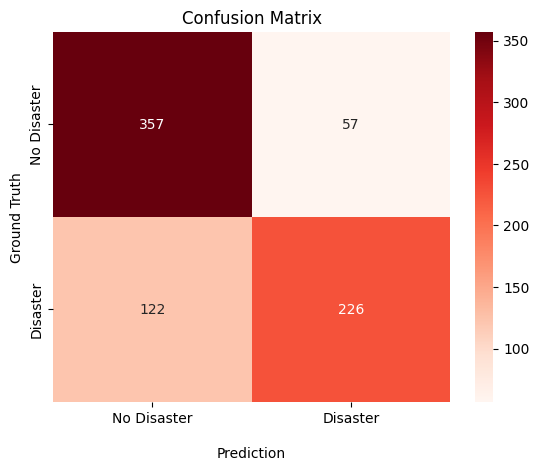

In [82]:
confusion_matrix = cm(y_test,y_pred)
ax = sns.heatmap(confusion_matrix, annot=True,fmt='d',cmap='Reds')
ax.set_title("Confusion Matrix");
ax.set_xlabel('\nPrediction')
ax.set_ylabel('Ground Truth');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['No Disaster','Disaster'])
ax.yaxis.set_ticklabels(['No Disaster','Disaster'])

In [83]:
text = " "

pred = model.predict([text])
if pred[0]==0:
    print("The given statement is not related to a disaster")
else:
    print("The given statement is related to a disater")

The given statement is related to a disater
